In [59]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Accuracy, Precision, Recall

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('../data/train/train-words.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'me': 7, 'no': 8, 'please': 9, 'sorry': 10, 'thankyou': 11, 'yes': 12, 'you': 13}
(420000, 11) (420000, 14)
(2800, 150, 11) (2800, 150, 14)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2100, 150, 11) (700, 150, 11)
(2100, 150, 14) (700, 150, 14)


In [51]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(150, 11), return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-03-17 23:42:54.833071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 23:42:54.835680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 23:42:54.837371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/5


2023-03-17 23:42:55.385833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 23:42:55.399635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 23:42:55.402901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - ETA: 0s - loss: 2.1644 - accuracy: 0.3213 - precision_7: 0.9110 - recall_7: 0.0053

2023-03-17 23:43:04.741976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 23:43:04.749661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 23:43:04.752115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - 11s 106ms/step - loss: 2.1644 - accuracy: 0.3213 - precision_7: 0.9110 - recall_7: 0.0053 - val_loss: 1.7327 - val_accuracy: 0.5078 - val_precision_7: 0.9627 - val_recall_7: 0.0436
Epoch 2/5
66/66 [==============================] - 6s 84ms/step - loss: 1.4988 - accuracy: 0.5574 - precision_7: 0.9781 - recall_7: 0.0896 - val_loss: 1.2981 - val_accuracy: 0.6272 - val_precision_7: 0.9671 - val_recall_7: 0.1433
Epoch 3/5
66/66 [==============================] - 6s 91ms/step - loss: 1.1585 - accuracy: 0.6636 - precision_7: 0.9544 - recall_7: 0.2528 - val_loss: 1.0280 - val_accuracy: 0.7278 - val_precision_7: 0.9605 - val_recall_7: 0.3238
Epoch 4/5
66/66 [==============================] - 5s 81ms/step - loss: 0.9108 - accuracy: 0.7500 - precision_7: 0.9517 - recall_7: 0.4326 - val_loss: 0.8271 - val_accuracy: 0.7695 - val_precision_7: 0.9453 - val_recall_7: 0.5066
Epoch 5/5
66/66 [==============================] - 6s 91ms/step - loss: 0.7425 - accurac

In [52]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 150, 64)           19456     
                                                                 
 dense_22 (Dense)            (None, 150, 14)           910       
                                                                 
Total params: 20,366
Trainable params: 20,366
Non-trainable params: 0
_________________________________________________________________


In [53]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

22/22 [==============================] - 1s 26ms/step - loss: 0.6856 - accuracy: 0.8030 - precision_7: 0.9271 - recall_7: 0.6320
Test loss: 0.6856042742729187
Test accuracy: 0.8029714226722717
Test precision: 0.9270637035369873
Test recall: 0.63201904296875


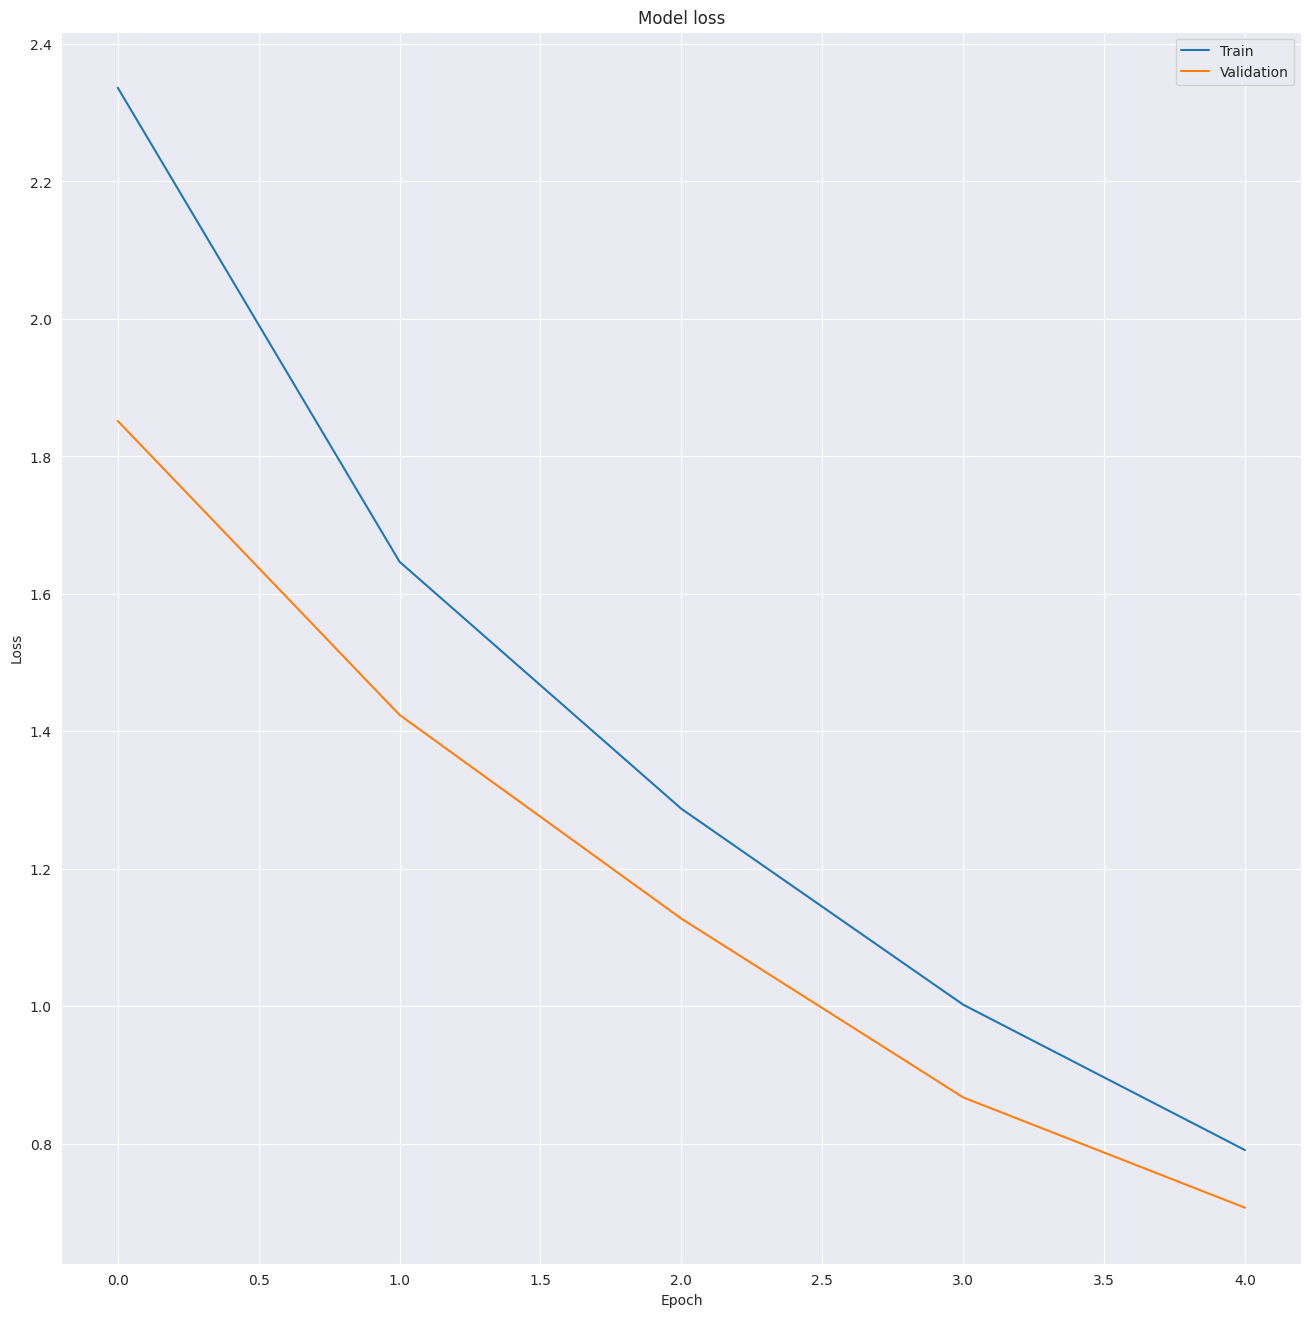

In [48]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

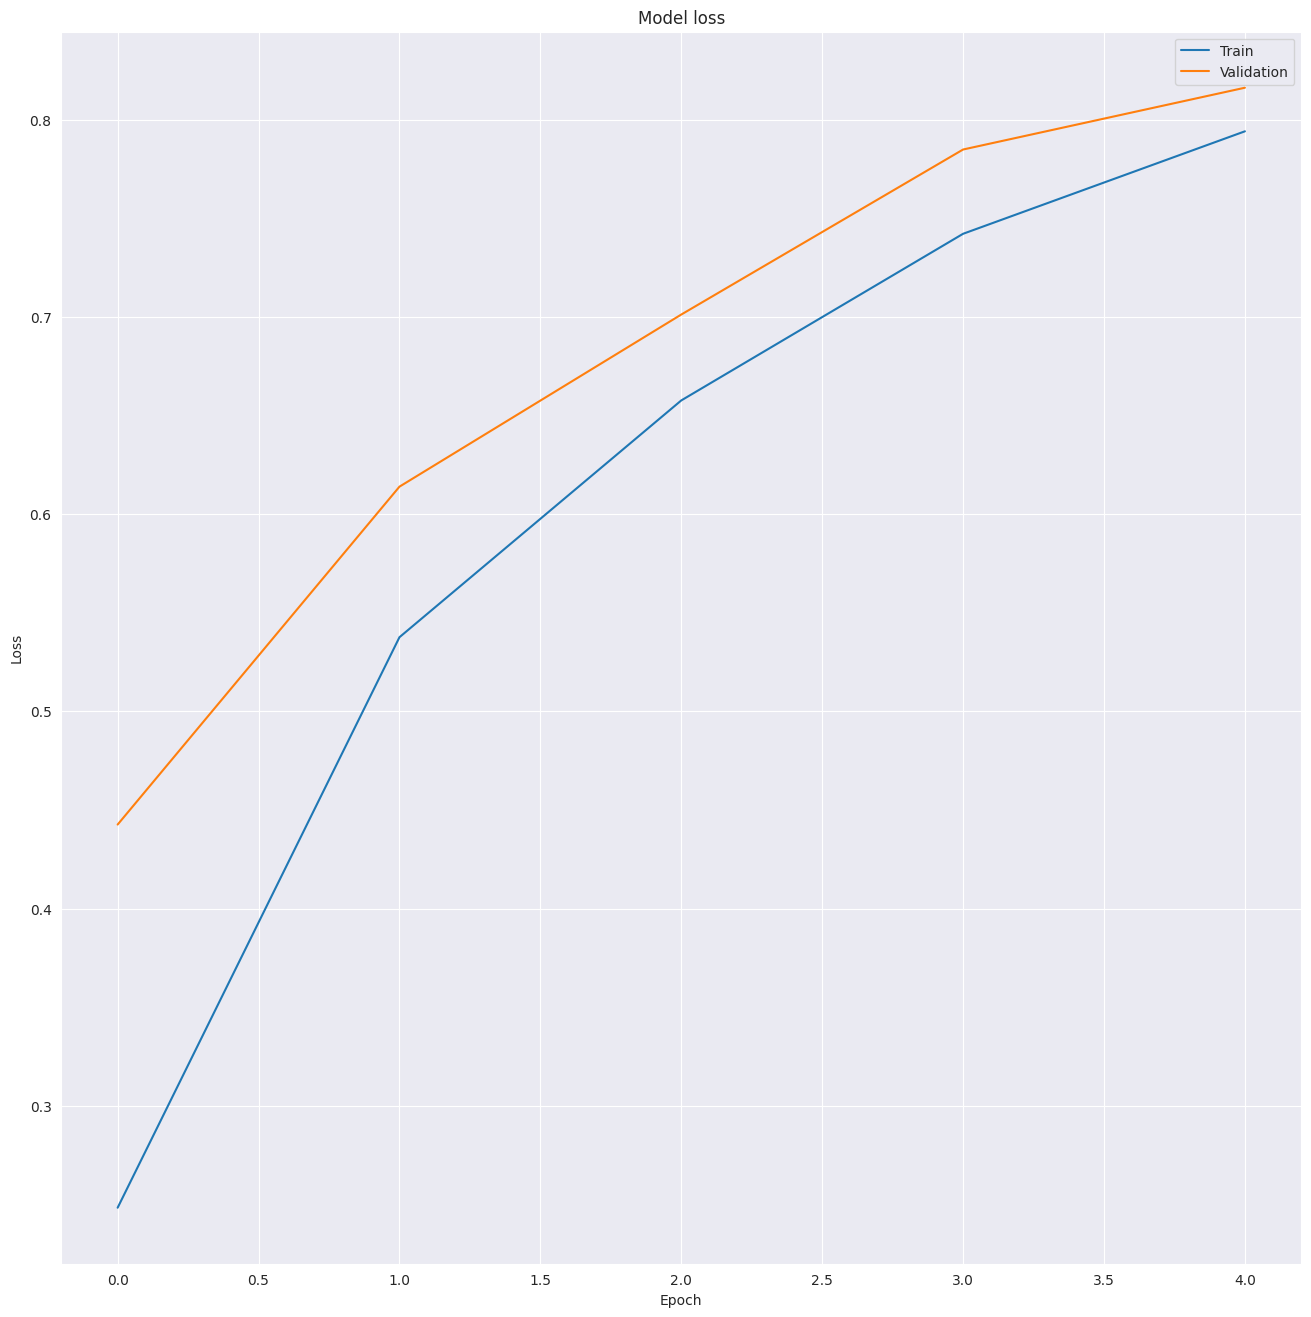

In [49]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [60]:
def plot_model_graph(model):
    graph = nx.DiGraph()

    # Add nodes to the graph
    for i, layer in enumerate(model.layers):
        graph.add_node(layer.name, layer=layer.__class__.__name__)

    # Add edges to the graph
    for layer in model.layers:
        for node in layer.inbound_nodes:
            for input_layer in node.inbound_layers:
                graph.add_edge(input_layer.name, layer.name)

    # Draw the graph
    pos = nx.spring_layout(graph)
    node_labels = nx.get_node_attributes(graph, 'layer')
    nx.draw_networkx_nodes(graph, pos, node_color='white', edgecolors='black')
    nx.draw_networkx_edges(graph, pos, arrows=True)
    nx.draw_networkx_labels(graph, pos, labels=node_labels)

    plt.axis('off')
    plt.show()

plot_model_graph(model)

TypeError: 'InputLayer' object is not iterable

In [8]:
model.save('../models/words.h5')